# 1.1 Generating standard test signals

## 1.1.1 Sinusoidal signals
The book initiates with some relatively simple signal generation. Let's work through this quickly, and add my own flavour.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

I have the feeling that we will be plotting timeseries data

In [2]:
def plot_timeseries_data(time, data, title, xlabel, ylabel, plt_show=True, discrete_plot=False):
    """
    Plot the timeseries data with the given title, xlabel, and ylabel.
    If discrete_plot is True, plot the data with a dot per datapoint, if False plot lines.
    If plt_show is True, show the plot (e.g. make False if you want more lines in one plot).
    """
    if discrete_plot:
        plt.plot(time, data, '.')
    else:
        plt.plot(time, data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if plt_show:
        plt.show()

The book uses `overSampRate`, which when multiplied with the signal frequency $f$ creates sampling frequency $f_s$. Not my personal favourite way of approaching this, but let's see if the books changes my mind.

Here is my approach to creating a sine wave. Personally I find mine more elegant, but that's opinion:

In [3]:
def sin_wave(duration=1, sample_rate=100, frequency=1, amplitude=1, phase_shift=0, dc_offset=0):
    """"
    Generate a sine wave data, with corresponding time data, with the given parameters.
    """
    time = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)  # np.linspace() doc: Return evenly spaced numbers over a specified interval.
    sine = amplitude * np.sin(2 * np.pi * frequency * time + phase_shift) + dc_offset
    return time, sine

Alright, let's recreate figure 1.1, which concludes 1.1.1.

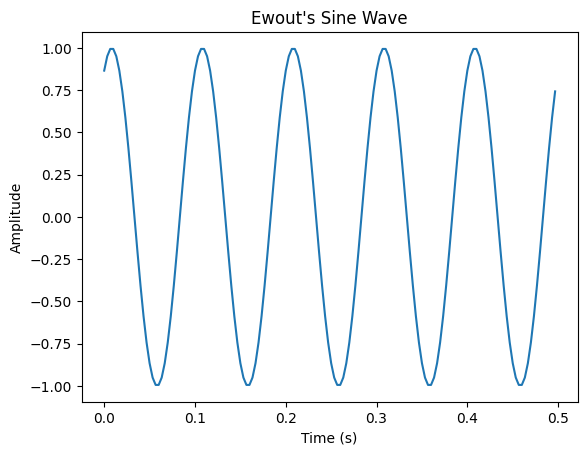

In [4]:
time, sine = sin_wave(frequency=10, duration=0.5, sample_rate=300, phase_shift=np.pi/3)
plot_timeseries_data(time, sine, 'Ewout\'s Sine Wave', 'Time (s)', 'Amplitude')

# 1.1.2 Square wave
Same as in 1.1.1, but now with squares. Also, the book briefly mentions the Gibbs Phenomenom, some good videos on this:
- https://www.youtube.com/watch?v=Ol0uTeXoKaU
- https://www.youtube.com/watch?v=98VixA3MjAc

Admittedly, I received some help from Copilot for the next code. Making a square wave without considering duty cycle is simple, with duty cycle it was too time consuming:

In [5]:
def square_wave(duration=1, duty_cycle=0.5,  sample_rate=100, frequency=1, amplitude=1, phase_shift=0, dc_offset=0):
    """"
    Generate a square wave data, with corresponding time data, with the given parameters.
    """
    time = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    period = 1 / frequency
    high_time = duty_cycle * period
    # The modulo operation gets the remainder, removing the full periods. The < high_time results in a boolean array. You can multiply booleans which will automatically convert them to integers (0, 1). Yes, really, that's some Python magic.
    square = amplitude * ((time + phase_shift / (2 * np.pi * frequency)) % period < high_time) * 2 - amplitude + dc_offset  
    return time, square

Let's recreate figure 1.2:

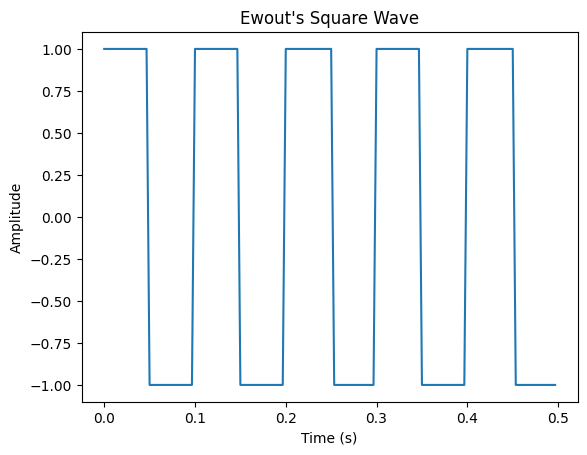

In [6]:
time, square = square_wave(frequency=10, duration=0.5, sample_rate=300)
plot_timeseries_data(time, square, 'Ewout\'s Square Wave', 'Time (s)', 'Amplitude')

I tried the (both) implementations that book uses, then also I get no zeroes (see below). From the formulas you would expect a zero between -1 and 1. But theirs and my implementation don't do this. For example, the `scipy.signal.square()`doc says:
- The square wave has a period $2\times pi$, has value $+1$ from $0$ to $2\times \pi \times duty$ and $-1$ from $2*\pi*duty$ to 2*pi.

See, no zeroes. Weird that figure 1.2 does show a zero at the beginning of the plot? That must be a different implementation than is shown in the text.

Anyway, I also want to showcase the duty cycle:

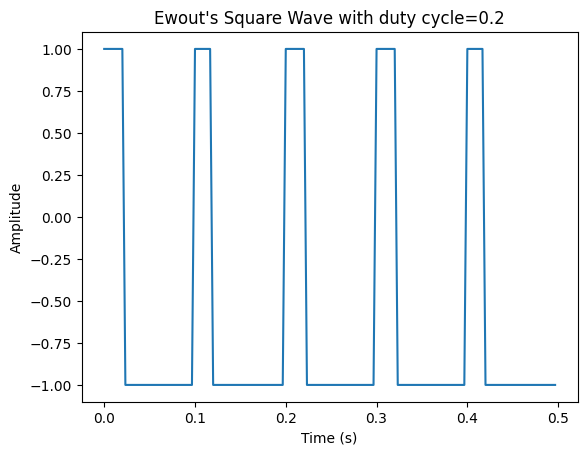

In [7]:
time, square = square_wave(frequency=10, duty_cycle=0.2, duration=0.5, sample_rate=300)
plot_timeseries_data(time, square, 'Ewout\'s Square Wave with duty cycle=0.2', 'Time (s)', 'Amplitude')

Here is the code from the book:

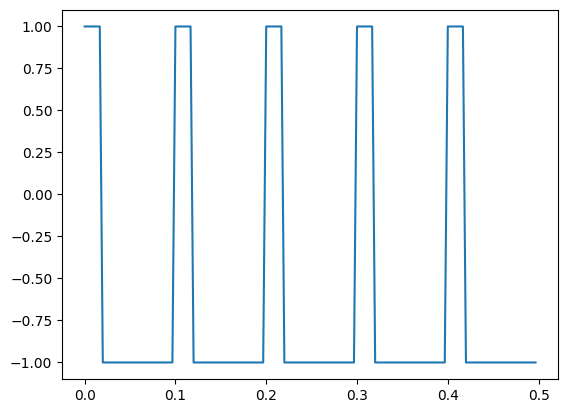

[ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1.]


In [8]:
def scipy_square_wave():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy import signal
    f = 10 # f = 10Hz
    overSampRate=30#oversamplingrate
    nCyl=5#numberofcyclestogenerate
    fs=overSampRate*f#samplingfrequency
    t=np.arange(start=0,stop=nCyl*1/f,step=1/fs)#timebase
    g=signal.square(2*np.pi*f*t,duty=0.2)
    plt.plot(t,g);plt.show()
    print(g)  # Ewout's addition

scipy_square_wave()


## 1.1.3 Rectangular pulse

The shape of a rectangular pulse is like that of a square, but then there is only one square, with it's center at $t=0$, and its amplitude is either $0$ or $1$ (so no negatives).

In [9]:
def rectangular_pulse(duration=1, pulse_duration=0.2, sample_rate=100, amplitude=1, dc_offset=0):
    """"
    Generate a rectangular pulse data, with corresponding time data, with the given parameters.
    Time is centered around 0.
    """
    time = np.linspace(-duration/2, duration/2, int(sample_rate * duration), endpoint=False)
    # I wanted to do this, but that does not consider 1/2 in the rising and falling edge:
    # pulse = amplitude * (np.abs(time) < pulse_duration / 2) + dc_offset
    # So let's do it the way the book does it:
    pulse = (time >-pulse_duration/2) * (time<pulse_duration/2) + 0.5*(time==pulse_duration/2) + 0.5*(time==-pulse_duration/2)  # The book also uses multiplication of booleans to get the values.
    pulse = amplitude * pulse + dc_offset  # Not sure why you would want this, but I am keeping my code consistent.
    return time, pulse


Recreating figure 1.3:

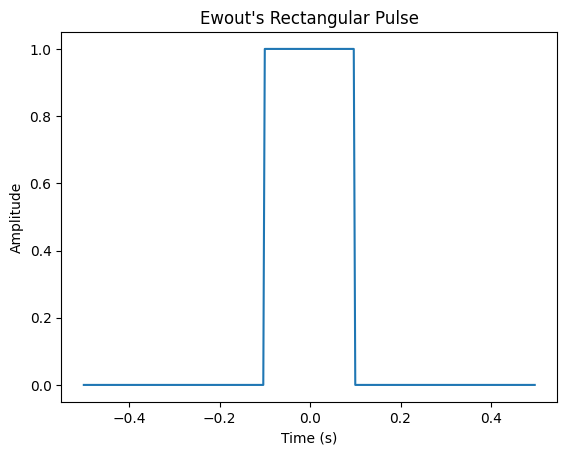

In [10]:
time, pulse = rectangular_pulse(duration=1, pulse_duration=0.2, sample_rate=300)
plot_timeseries_data(time, pulse, 'Ewout\'s Rectangular Pulse', 'Time (s)', 'Amplitude')

## 1.1.4 Guassian pulse
Some properties of guassian pulse:
- The impulse response of a Gaussian filter is Gaussian.
- Gaussian filters give no overshoot with minimal rise and fall time, when excited with a step function.
- Gaussian filter has minimum group delay.

This is seen in:
- 2D version of this is used for blurring images.
- Gaussian Minimum Shift Keying (GMSK).
- Gaussian Frequency Shift Keying (GFSK).

In [11]:
def guassian_pulse(duration=1, sample_rate=100, sigma=0.1):
    """"
    Generate a Gaussian pulse data, with corresponding time data, with the given parameters.
    Time is centered around 0.
    """
    time = np.linspace(-duration/2, duration/2, int(sample_rate * duration), endpoint=False)
    pulse = 1/(np.sqrt(2*np.pi)*sigma)*(np.exp(-time**2/(2*sigma**2)))  # Identical to the book, I see no other reasonable way of implementing this.
    return time, pulse

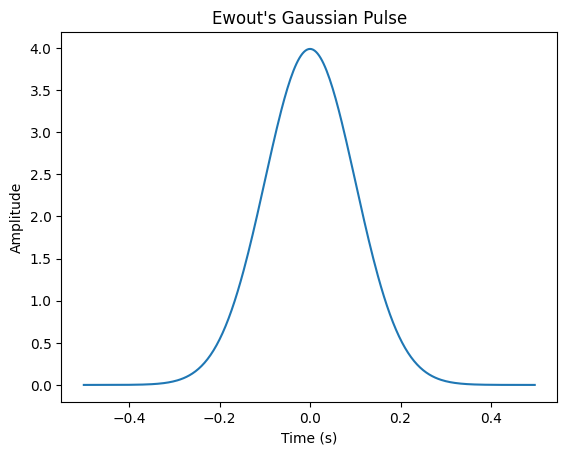

In [12]:
time, pulse = guassian_pulse(duration=1, sigma=0.1, sample_rate=300)
plot_timeseries_data(time, pulse, 'Ewout\'s Gaussian Pulse', 'Time (s)', 'Amplitude')

## 1.1.5 Chirp signal



In [111]:
def chirp_wave(duration=1, sample_rate=100, frequency_start=1, frequency_end=10, amplitude=1, phase_shift=0):
    # frequencies = np.linspace(frequency_start, frequency_end, len(time))  # This is what I wanted to do, but it is not correct.
    """
    Generate a chirp data, with corresponding time data, with the given parameters.
    At first I wanted to create a linearly increasing array of frequencies, but than I noticed this from the book: 
        A linear chirp signal sweeps the frequency from low to high frequency (or vice-versa) linearly.
        One approach to generate a chirp signal is to concatenate a series of segments of sine waves each with increasing (or decreasing) frequency in order.
        This method introduces discontinuities in the chirp signal due to the mismatch in the phases of each such segments.
        Modifying the equation of a sinusoid to generate a chirp signal is a better approach.
    """
    time = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    #  f(t) = f0 + (f1 - f0) * t / t1, as per https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html#:~:text=f(t)%20%3D%20f0%20%2B%20(f1%20%2D%20f0)%20*%20t%20/%20t1
    # (Also, the book uses the same formula, but in two seperate formulas)
    frequencies = frequency_start + (frequency_end - frequency_start) * time / duration  # TODO: I checked, the output here is identical to the first line that I proposed?!
    chirp = amplitude * np.cos(2 * np.pi * frequencies * time + phase_shift)
    return time, chirp

Let's see my effort:

[ 1.          1.00633333  1.01266667 ... 19.981      19.98733333
 19.99366667]
[ 1.          1.00633545  1.01267089 ... 19.98732911 19.99366455
 20.        ]


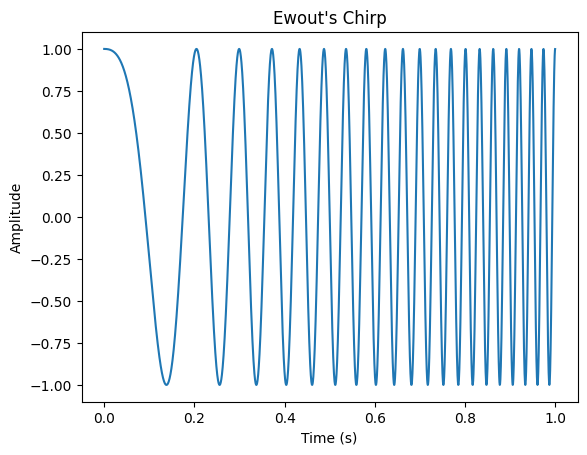

In [112]:
time, chirp_signal = chirp_wave(duration=1, sample_rate=3000, frequency_start=1, frequency_end=20, phase_shift=0)
plot_timeseries_data(time, chirp_signal, 'Ewout\'s Chirp', 'Time (s)', 'Amplitude')

Comparing my work to Scipy's

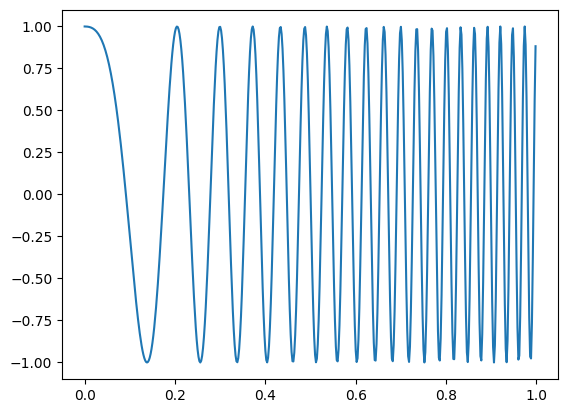

In [83]:
from scipy.signal import chirp

# Code from the book (I hate how the figure 1.5 does not correspond to the code directly above it)
def chirp_demo():
 """
 Generating and plotting a chirp signal
 """
 import numpy as np
 import matplotlib.pyplot as plt
 from scipy.signal import chirp
 fs = 500 # sampling frequency in Hz
#  t =np.arange(start = 0, stop = 1,step = 1/fs) #total time base from 0 to 1 second
 t = np.linspace(0, 1, int(fs * 1), endpoint=False)
 g = chirp(t, f0=1, t1=0.5, f1=20, phi=0, method='linear')
 plt.plot(t,g); plt.show()

chirp_demo()

Looks good! But I am still not happy, because the problem that they talked about is still not solved, right?

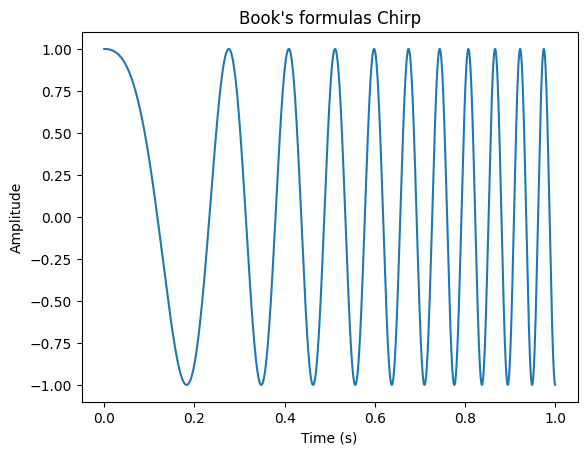

In [116]:
def chirp_wave_book_formula(duration=1, sample_rate=100, frequency_start=1, frequency_end=10, amplitude=1, phase_shift=0):
    # frequencies = np.linspace(frequency_start, frequency_end, len(time))  # This is what I wanted to do, but it is not correct.
    """
    Generate a chirp data, with corresponding time data, with the given parameters.
    At first I wanted to create a linearly increasing array of frequencies, but than I noticed this from the book: 
        A linear chirp signal sweeps the frequency from low to high frequency (or vice-versa) linearly.
        One approach to generate a chirp signal is to concatenate a series of segments of sine waves each with increasing (or decreasing) frequency in order.
        This method introduces discontinuities in the chirp signal due to the mismatch in the phases of each such segments.
        Modifying the equation of a sinusoid to generate a chirp signal is a better approach.
    """
    time = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
    #  As per book: k = (f1 - f0) / t1
    k = (frequency_end - frequency_start) / duration
    # As per book: f(t) = k/2 * t + f0 * t 
    frequencies = k / 2 * time + frequency_start
    chirp = amplitude * np.cos(2 * np.pi * frequencies * time + phase_shift)
    return time, chirp

time, chirp_signal = chirp_wave_book_formula(duration=1, sample_rate=3000, frequency_start=1, frequency_end=20, phase_shift=0)
plot_timeseries_data(time, chirp_signal, 'Book\'s formulas Chirp', 'Time (s)', 'Amplitude')

Now this output is unlike any other output.. I am confused